# Emergency Calls Data Analysis

## Setup and Data Cleaning

In [80]:
import numpy as np
import pandas as pd

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [82]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1




**** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. A new column called "Reason" can be created which contains this string value. ****


**** For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. ****



In [84]:
#create new column called 'Reason' 
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [85]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [86]:
# Convert 'timeStamp' to datetime pbject for time-based analysis
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#Create new columns for year,month,day,hour
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.day)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [87]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,Day,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,17,12,10,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,17,12,10,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,17,12,10,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,17,12,10,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,17,12,10,3,2015-12-10


In [88]:
#Day of Week is an integer 0-6. Map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [89]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,Day,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,17,12,10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,17,12,10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,17,12,10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,17,12,10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,17,12,10,Thu,2015-12-10


In [90]:
#drop dummy variable column
df = df.drop('e', axis=1)

In [91]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Year,Hour,Month,Day,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,17,12,10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,17,12,10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,2015,17,12,10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,17,12,10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,17,12,10,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,Traffic,2016,11,8,24,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,Traffic,2016,11,8,24,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,2016,11,8,24,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,EMS,2016,11,8,24,Wed,2016-08-24


## Data Exploration

### Location Analysis

In [92]:
#Top 10 Zip Codes for 911 calls
df['zip'].value_counts().head(10)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: count, dtype: int64

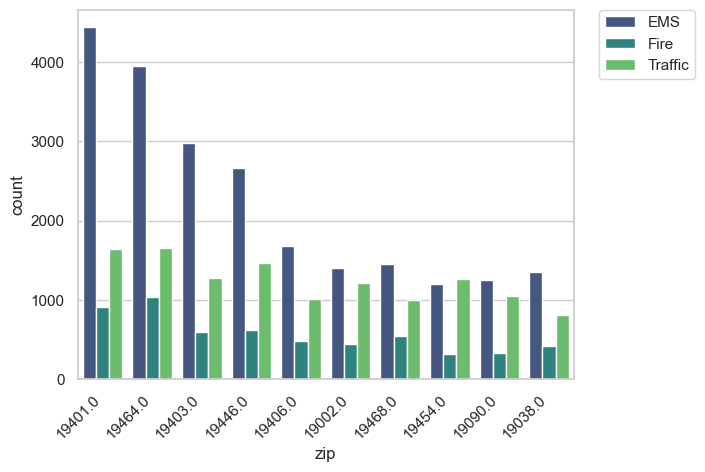

In [112]:
#Plot the top 10 zip codes broken down by reason
sns.countplot(x='zip', data=df, hue='Reason', order=df['zip'].value_counts().head(10).index, palette='viridis')
plt.xticks(rotation=45, ha='right')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Seems like EMS is generally the most common reason for an emergency call across the top 10 zip codes.

### Call Reason Analysis

In [106]:
#Most common reason for 911 calls
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

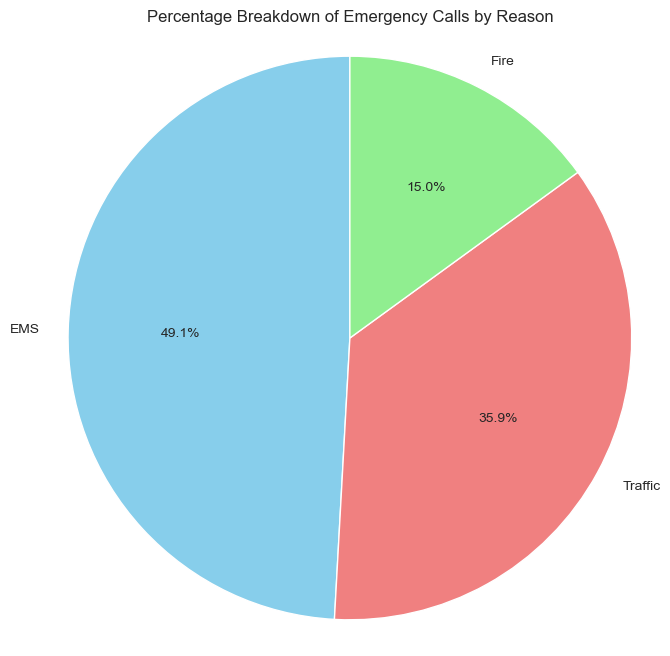

In [108]:
# Create a pie chart to display the percentage of calls for each emergency reason

# Calculate the percentage breakdown
reason_percentage = df['Reason'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(reason_percentage, labels=reason_percentage.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

# Adjust plot aesthetics
plt.title('Percentage Breakdown of Emergency Calls by Reason')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

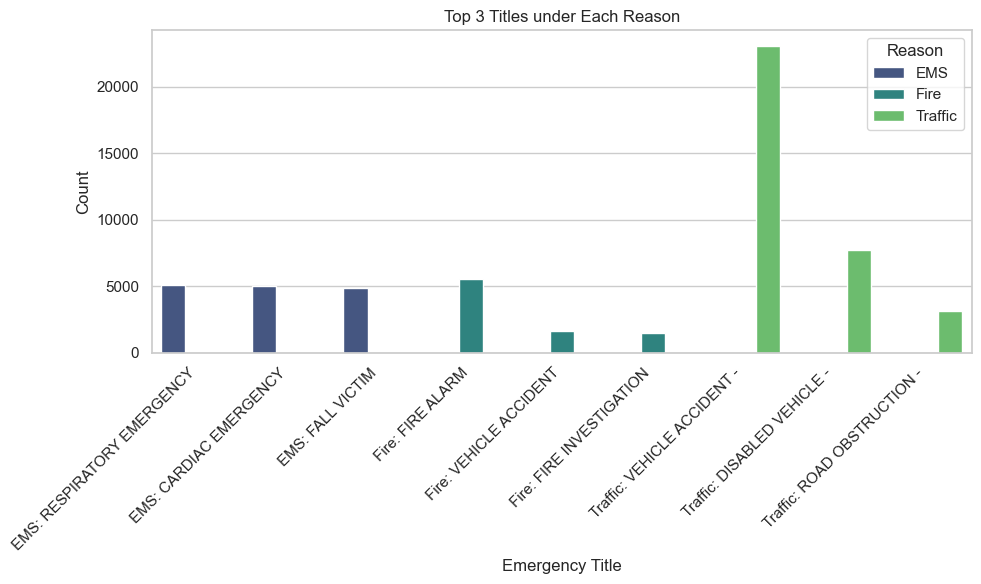

In [111]:
# Create a grouped bar chart to display the top titles under each emergency call reason

# Create a DataFrame for the top 3 titles under each reason
top_titles_df = df.groupby('Reason')['title'].value_counts().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='title', y='Count', hue='Reason', data=top_titles_df, palette="viridis")
plt.title('Top 3 Titles under Each Reason')
plt.xlabel('Emergency Title')
plt.ylabel('Count')
plt.legend(title='Reason')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


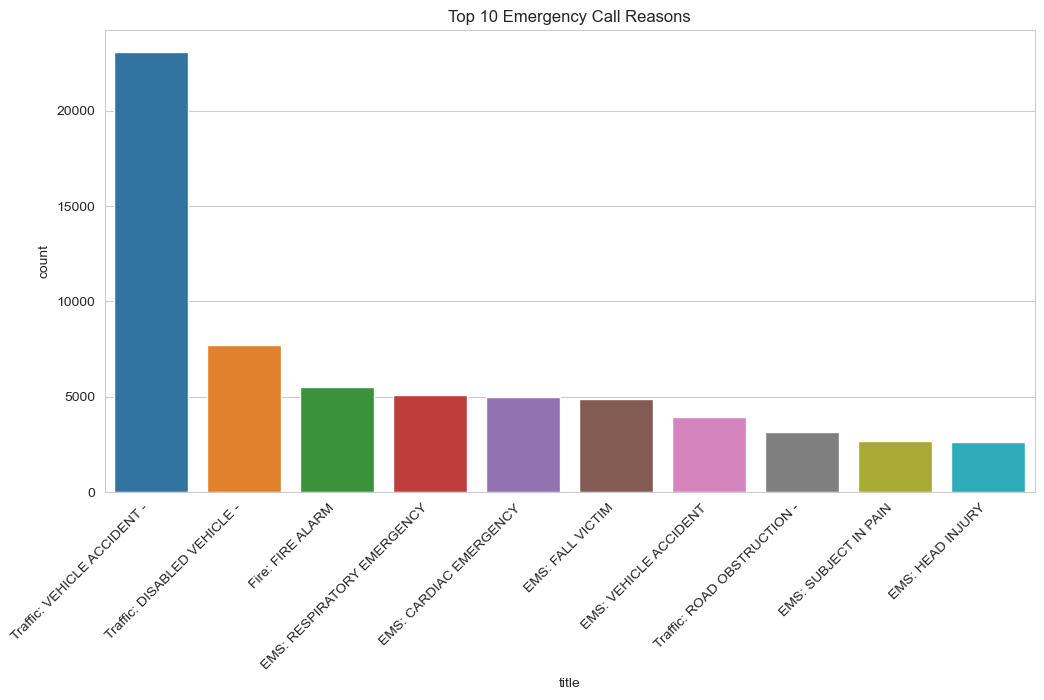

In [17]:
#Top 10 emergency call titles overall
plt.figure(figsize=(12, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().head(10).index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Emergency Call Reasons')
plt.show()

In [44]:
#Vehicle accidents account for the highest number of calls. Find zip codes where more vehicle accidents are likely to happen.
traffic_accident_df = df[df['title'] == 'Traffic: VEHICLE ACCIDENT -']
traffic_accident_df['zip'].value_counts().head(10)

zip
19401.0    1218
19446.0    1039
19464.0     980
19454.0     884
19403.0     876
19406.0     811
19090.0     750
19002.0     747
19468.0     663
19426.0     588
Name: count, dtype: int64

### Time Analysis

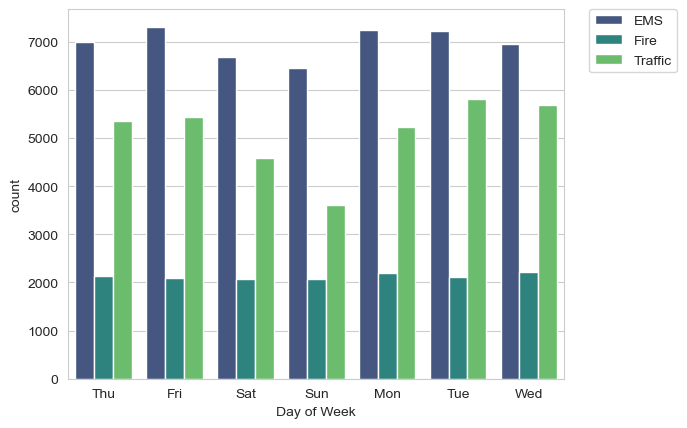

In [46]:
#Plot the emergency calls based on the day of the week
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

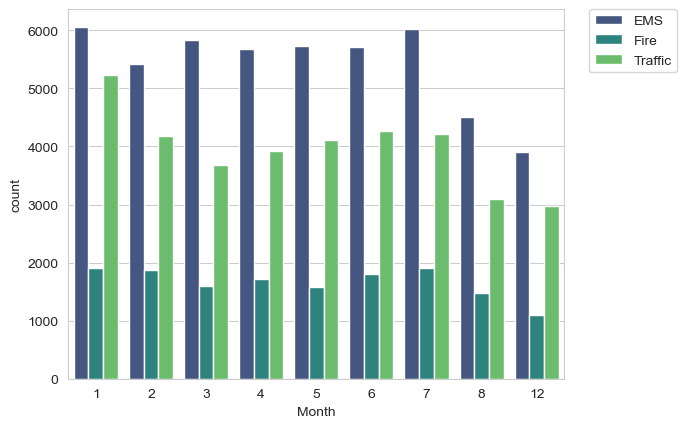

In [47]:
#Plot the emergency calls based on the month
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [49]:
#Seems like the plot is missing months 9,10,11.
#fill in this information by plotting a line plot that fills in the missing months

byMonth = df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Year,Hour,Day,Day of Week,Date
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


<Axes: xlabel='Month'>

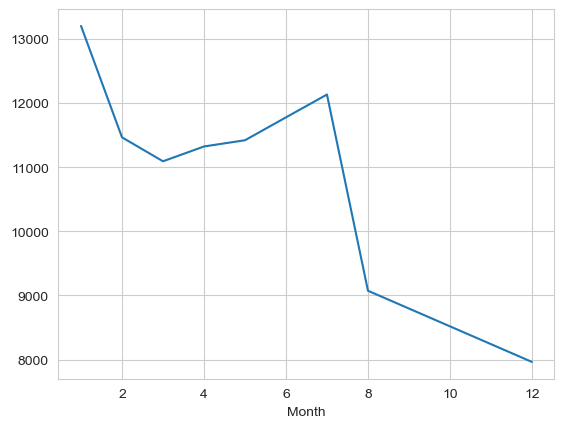

In [50]:
byMonth['twp'].plot()

#The number of emergency calls are highest at the beginning of the year.Drops down, then peaks again in the summer. Then continues to drop.

C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


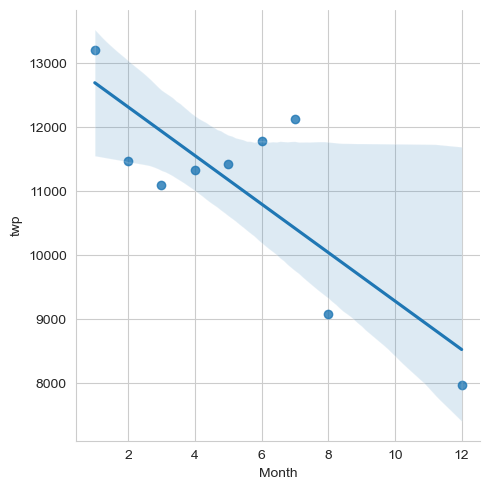

In [76]:
#use seaborn's lmplot() to create a linear fit on the number of calls per month
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

#Negative correlation between number of calls and month

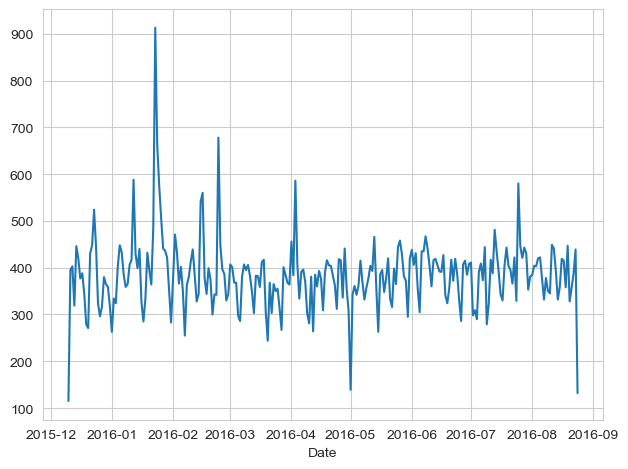

In [54]:
#Create a time series plot for the distribution of emergency calls over time
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

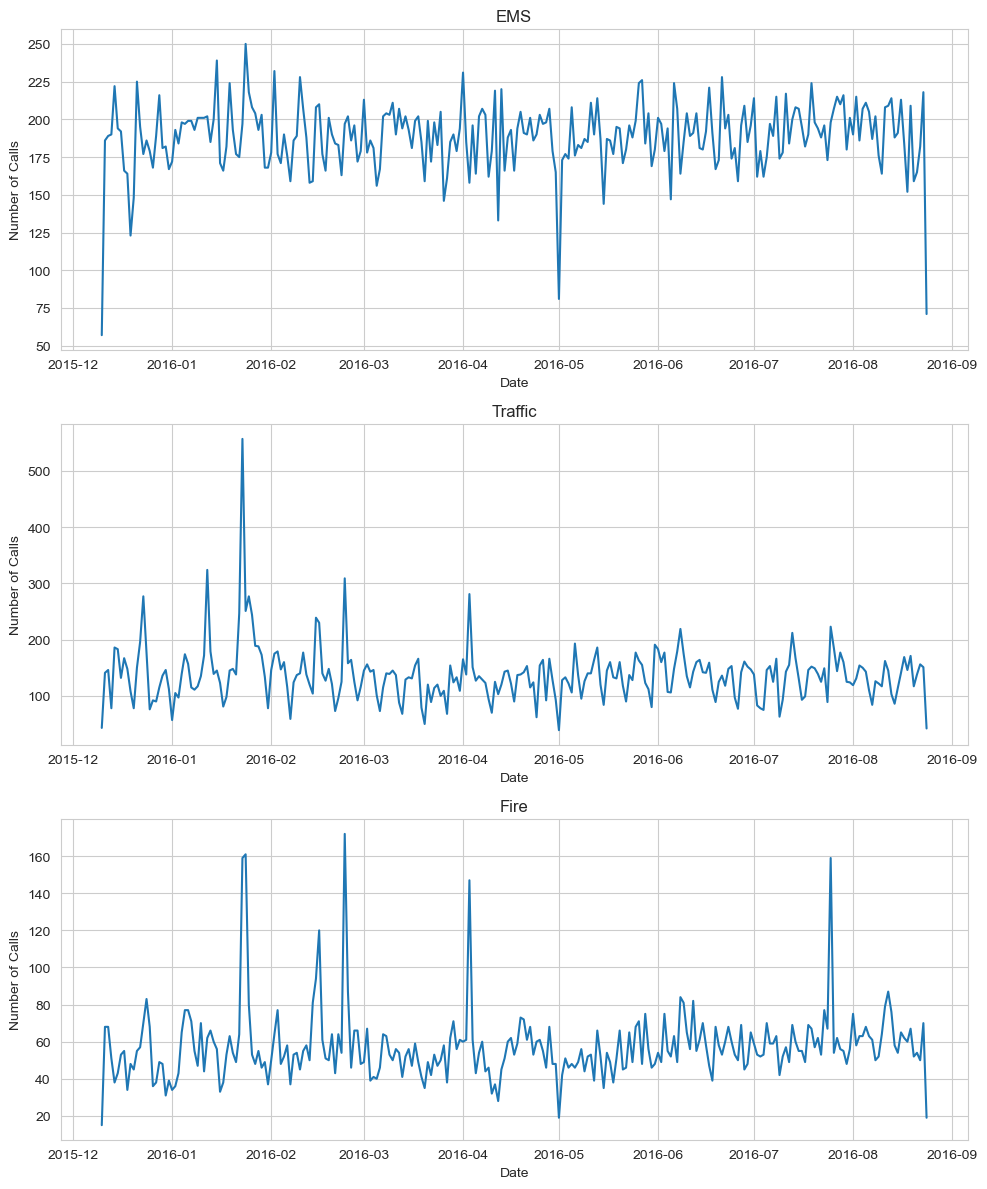

In [58]:
#Create time series plots for each emergency call reason (EMS, Traffic, and Fire)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# List of emergency call reasons
reasons = ['EMS', 'Traffic', 'Fire']

# Plot each reason separately
for i, reason in enumerate(reasons):
    df[df['Reason'] == reason].groupby('Date').count()['twp'].plot(ax=axes[i])
    axes[i].set_title(reason)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Calls')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [60]:
#Create a heatmap for emergency calls based on the hour and day of the week

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='Day of Week'>

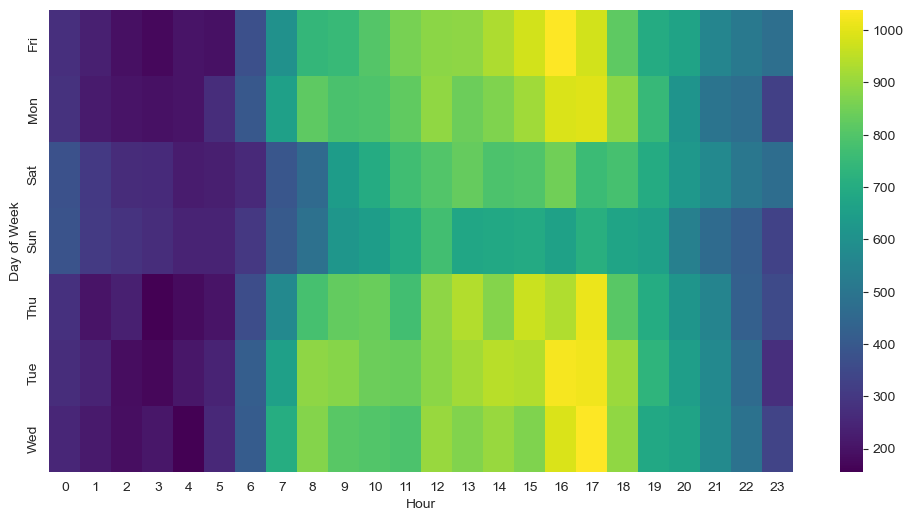

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')